<a href="https://colab.research.google.com/github/choiwhmarco/MyFirstPullRequest/blob/master/COGS_108_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Causes Suicides Globally? 

Team #58: 

1. Wan Hin Choi -  A12427755
2. Shivani Patel - A12644136
3. Michael Remediakis - A15736073
4. Samantha Stone - A12861099
5. Yingkun Wang - A13703097
6. Yujie Wang - A13710508



# 1. Introduction

In this study, we analyze factors that correlate to suicide rates among different cohorts in various countries between 1985 and 2016. We will first explore the data provided and look for any correlation with suicide rates among various factors such as age, gender, and geographical region building upon existing research.  We decide to work on this topic because we are inspired by suicide prevention. Suicide issues have a tight relation to both families and individuals. 

## 1.1 Overview

In this project, we used various factors such as age, gender, and geographical region to find out what has a big influence on suicide rate. To compare different factors, we used regression, plots, and graphs to find out whether the correlation is strong or weak. Throughout the study, we concluded that  suicide rates would be higher for individuals whose age are 35+, males, and GDP has weak correlation with suicide rate. 

## 1.2 Research Question

Is there any correlation between suicide rates and factors such as gender, age, and gdp? 

## 1.3 Background

According to the CDC’s National Vital Statistics System data, from 1999 to 2017, Suicide rates have increased by 33%. Alarmingly, American suicides are at their highest point in 50 years and suicides have now become the second-leading cause of death for Americans under the age of 35. Suicide is often considered a disturbing indicator of underlying social problems and this rise in suicide rates could be an indicator of rising social problems. It seems that suicide rates are not consistent across the entire population. Jamie Ducharme from TIME shares that U.S boys have died by suicide far more frequently than girls, even though girls attempt suicide and report contemplating it more often. Studies also look to see how suicides are being committed. Girls are more likely to attempt suicide by methods such as poisoning while boys have more often used lethal means such as firearms. This could help explain the “gender paradox” of why girls often outpace boys in attempts while the reverse is true for deaths. Additional studies show that the suicide rate increased with decreasing urbanization. Suicide rates for the most rural counties was 1.4 times the rate for urban areas. 

## 1.4 Sources
1. https://psmag.com/news/the-suicide-rate-is-at-its-highest-in-a-half-century 
2. https://www.cdc.gov/nchs/products/databriefs/db330.htm
3. http://time.com/5590344/youth-suicide-rates
4. https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016 

## 1.5 Hypothesis
Based on what we've seen with suicide trends in the US, we presume that suicide rates would be higher for younger individuals, for males, and those in countries with a weaker economy. We expect that the global trends will follow the trends we see in the US


## 1.6 Dataset
The data set being used is a compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum. We obtained this dataset from kaggle (link in sources). The data contains many factors in columns, such as “country”, “year”, ”suicide rate”, “age”, and more. 

## 1.7 Library Imports and Setup

In [0]:
#Hides unnecessary output
%%capture
!pip install scipy==1.2 --upgrade
!pip install geopandas
!pip install descartes

In [0]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

import patsy
import statsmodels.api as sm

import numpy as np 
import pandas as pd

#import data 
url = 'https://raw.githubusercontent.com/shivanipatel7/COGS-108-Final-Project/master/master.csv'
original_data = pd.read_csv(url)

# 2. Data Cleaning and Pre-Processing


We first look at the first few rows of data, and observe columns, types and missingness of dataframe. After we dropped some irrelevent columns corresponding to our research, we select the sub-table from data based on the year after 2010. Then we do some groups and comparisons between various groups in order to help with future analyzing and try to find patterns between columns.

## 2.1 Column Features:

*   country:                    Names of the 101 countries where data are collected from
*   year:                          Years from 1987 to 2016
*   sex:                            Female or male
*   age:                           '5-14 years' ,'15-24 years', '35-54 years', '75+ years', '25-34 years', '55-74 years' 
*   suicides_no:             Numbers of suicides during the given year
*   population:               Population of the country in the year
*   suicides/100k pop: Numbers of suicides per 100k population
*   country-year:            String of  country and year combined
*   HDI for year:             Human development index for the given year
*   gdp_for_year:           GDP of the country for the given year
*   gdp_per_capita:       GDP per capita for the country
*   generation:               Generation (based on age grouping average)


In [0]:
# check whether each type of columns as our excepted
print(original_data.dtypes)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


## 2.2 Data Cleaning

Since each columns has the correct data type, we do not need to further set the type manully. We then need to deal with the missingness of data. We dropped the column 'HDI for year' since it contained mostly missing data. And we dropped the 'generation' column since it wouldn't be relevant to our analysis. Finally we dropped 'country-year' since the same information can be taken from other columns.

In [0]:
original_data.isnull().any()
data=original_data.drop(['HDI for year','generation', 'country-year'],axis=1)

We rename some columns to make the dataset easier to access.

In [0]:
data.rename(index = str, columns = {'suicides/100k pop':'suiciderate'}, inplace=True)
data.rename(index = str, columns = {'gdp_per_capita ($)':'gdp'}, inplace=True)
data.rename(index = str, columns = {' gdp_for_year ($) ':'yearlygdp'}, inplace=True)

In order to avoid misrepresentation of any country, we removed countries that we had too little information on.

In [0]:
missing_countries = ['Antigua and Barbuda', 'Aruba','Bahrain','Barbados',
                     'Cabo Verde','Grenada','Maldives','Malta','Mauritius',
                     'Saint Lucia','Saint Vincent and Grenadines','Seychelles',
                     'Singapore']
data = data[~data['country'].isin(missing_countries)]


We corrected the name of any country who's name isn't written in the common form used by most geomapping software.

In [0]:
data.loc[data['country'] == 'United States', 'country'] = 'United States of America'
data.loc[data['country'] == 'Republic of Korea', 'country'] = 'South Korea'
data.loc[data['country'] == 'Russian Federation', 'country'] = 'Russia'
data.loc[data['country'] == 'Bosnia and Herzegovina', 'country'] = 'Bosnia and Herz.'
data.loc[data['country'] == 'Czech Republic', 'country'] = 'Czechia'

To ensure our analysis was relevent to current state of the world, we  dropped any data from before 2010.

In [0]:
total_data = data.copy()
data = data[data['year'] >= 2010]


## 2.3 Overview of Data

Here is the overview of data in each column, which will be helpful in our further analysis. We checked the data of the first row to understand its general structure.

In [0]:
data.iloc[0]

country               Albania
year                     2010
sex                      male
age               55-74 years
suicides_no                20
population             241852
suiciderate              8.27
yearlygdp      11,926,953,259
gdp                      4359
Name: 252, dtype: object

There is an even distribution of males and females within the dataset.

In [0]:
data.sex.value_counts()

male      2566
female    2566
Name: sex, dtype: int64

We have information from a total of 80 countries.

In [0]:
data.country.unique().size

80

The gdp of the countries we have observations from ranges from 991 to 126352.

In [0]:
print("GDP Range:", (data.gdp.min(), data.gdp.max()))

GDP Range: (991, 126352)


Each observation is placed in one of  6 age groups and there's an about even distribution of observations from each age group.

In [0]:
data.age.unique()

array(['55-74 years', '35-54 years', '25-34 years', '75+ years',
       '15-24 years', '5-14 years'], dtype=object)

In [0]:
data.age.value_counts()

25-34 years    860
75+ years      860
15-24 years    860
35-54 years    860
55-74 years    860
5-14 years     832
Name: age, dtype: int64

For example, the column with the highest suicide rate is the group of males ages 35-54 in the Suriname with a suicide rate of 27.49 people per 100k people.

In [0]:
# find the column with the maximum suicide number
data.loc[data['suiciderate'].idxmax()]

country             Suriname
year                    2012
sex                     male
age                75+ years
suicides_no               10
population              5346
suiciderate           187.06
yearlygdp      4,980,000,000
gdp                    10227
Name: 24332, dtype: object

# 3. Data Analysis
   

## 3.1 Suicide Rates By Age

We first investigated the relationship between young and old people's suicide rate. We combined the ages into two groups, placing people with ages between 5-34 in the first group and ages above 34 in the second group.

In [0]:
# copy the origional data and change the column
agegrp = data[['age','suicides_no','suiciderate']].copy()
agegrp['age'] = agegrp['age'].apply(lambda x: '5-34' if x == '15-24 years' or x == '5-14 years' or x == '25-34 years' else '35+')
agegrp = agegrp.sort_values(by='suicides_no', ascending=True)

In [0]:
agegrp.groupby('age').mean()

,suicides_no,suiciderate
age,,
35+,382.560853,17.243477
5-34,149.124608,6.963209


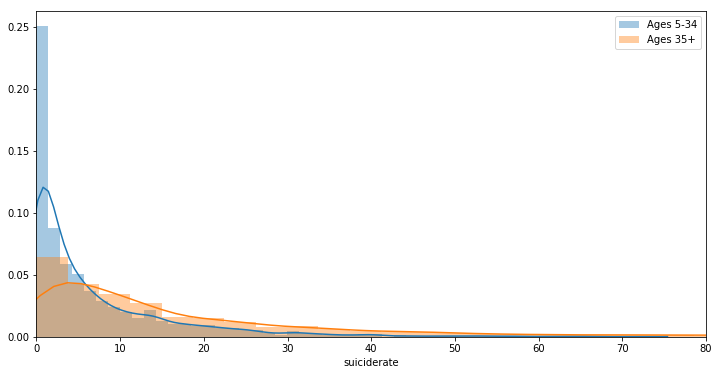

In [0]:
plt.figure(figsize = (12,6))
sns.distplot(agegrp[agegrp['age'] == '5-34']['suiciderate'], label = 'Ages 5-34')
sns.distplot(agegrp[agegrp['age'] == '35+']['suiciderate'], label = 'Ages 35+')
plt.xlim(0, 80)
plt.legend();

From the table, we realize that older people are much more likely to commit suicide globally. Moreover from the picture above, we observe that youth group has more shaded area at range 0 to around 5. However, the likelihood of youth suicide then surpasses that of older people as countries get higher suicide rates.

In [0]:
#linear model for age 
outcome_age, predictors_age = patsy.dmatrices('suiciderate ~ age', data)
mod_age = sm.OLS(outcome_age, predictors_age)
res_age = mod_age.fit()
print(res_age.summary())

                            OLS Regression Results                            
Dep. Variable:            suiciderate   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     186.8
Date:                Thu, 13 Jun 2019   Prob (F-statistic):          2.61e-183
Time:                        02:05:33   Log-Likelihood:                -21305.
No. Observations:                5132   AIC:                         4.262e+04
Df Residuals:                    5126   BIC:                         4.266e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.6350      0

From this model, we can see how different cohorts affect the suicide rate. For example, the suicide rate for the 5-14 cohort is 7.9719 lower than the average suicide rate of 14-25 year cohort. The suicide rate for the 25-34 cohort is on average 2.7514 higher than the average suicide rate for the 14-25 cohort. Based on the results, we can see that suicide rates are increasing as age cohorts increase. The p-values for each of our coefficients are = 0 which implies that are results are statistically significant. The R-squared values, however so only a small percentage of the variability in the data can be explained by this model 

## 3.2 Suicide Rates By Country GDP

In this section, we analyze the relationship between suicide rates and different countries. Along with this, we take into account the correlation between suicide rates and country GDP. Based on this information, we found that those countries with a higher GDP have a higher suicide rate.

In [0]:
country = data[['country', 'suiciderate', 'gdp']].copy()

sum_country = country.groupby('country').mean()
sum_country.sort_values(by = 'suiciderate', ascending = False).head()

,suiciderate,gdp
country,,
South Korea,37.215972,26367.500000
Lithuania,33.781463,15358.731707
Suriname,31.281000,9913.600000
Guyana,30.770000,3945.750000
Belarus,24.116042,7649.750000


In [0]:
mean_gdp = country['gdp'].mean()
country['gdp'] = country['gdp'].apply(lambda x: 'above average' if x > mean_gdp else 'below average')

In the table below, we can see that higher GDP leads to higher suicide rates

In [0]:
country.groupby('gdp')['suiciderate'].mean()

gdp
above average    10.970654
below average    12.819469
Name: suiciderate, dtype: float64

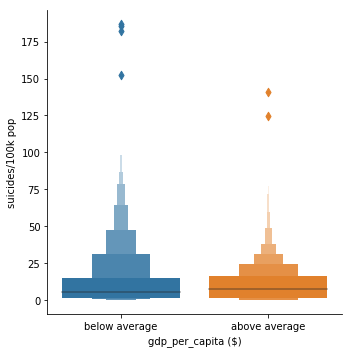

In [0]:
# sns.catplot(x="gdp_per_capita ($)", y="suicides/100k pop", kind = 'boxen', data=country);
ax = sns.catplot(x="gdp", y="suiciderate", kind = 'boxen', data=country)
ax.set_xlabels("gdp_per_capita ($)")
ax.set_ylabels("suicides/100k pop");

In [0]:
#linear model for gdp 
outcome_gdp, predictors_gdp = patsy.dmatrices('suiciderate ~ gdp', data) 
mod_gdp = sm.OLS(outcome_gdp, predictors_gdp) 
res_gdp = mod_gdp.fit() 
print(res_gdp.summary()) 

                            OLS Regression Results                            
Dep. Variable:            suiciderate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3735
Date:                Thu, 13 Jun 2019   Prob (F-statistic):              0.541
Time:                        02:05:33   Log-Likelihood:                -21734.
No. Observations:                5132   AIC:                         4.347e+04
Df Residuals:                    5130   BIC:                         4.349e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2839      0.342     35.960      0.0

From this model, we aim to see how gdp affects suicide rates. Because the p-value, 0.541 is not significant (it is not less than 0.05). We cannot say that GDP is a significant factor affecting suicide rate.



## 3.3 Changes of Suicide Rates Over Time

In this analysis, we won't work with just the recent data. Instead we will pull from the entire dataset to analyze how suicide rates change over time.

To make a more direct comparison to our initial assumptions in our hypothesis, we create two plots of suicide rates over time, one for the United States population and the second for the global population.

In [0]:
#group data by year and calculate suicides/100k each year in the United States
US_pop_sum=total_data[total_data['country'] == "United States of America"].groupby('year')['population'].sum()
US_sui_sum=total_data[total_data['country'] == "United States of America"].groupby('year')['suicides_no'].sum()
US_per100k=(US_sui_sum / US_pop_sum) * 100000

Minimum Suicide Rate: (2000, 11.189107904701489)


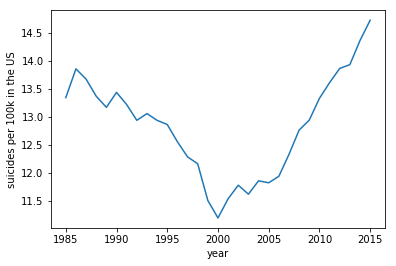

In [0]:
#draw a plot to see the trend during years
plt.plot(US_per100k)
plt.xlabel('year')
plt.ylabel('suicides per 100k in the US');
print("Minimum Suicide Rate:", (US_per100k.idxmin(), US_per100k.min()))

In the plot we create for US suicide rates we notice that suicide rates had a downwards trend starting from the mid 80's. However after the turn of the century, suicide rates began to shoot up, with our most recent data being the highest it's ever been.

In [0]:
#group data by year and calculate suicides/100k each year globally
pop_sum=total_data.groupby('year')['population'].sum()
sui_sum=total_data.groupby('year')['suicides_no'].sum()
per100k=(sui_sum / pop_sum) * 100000

Peak Suicide Rate: (1995, 15.312412627818665)


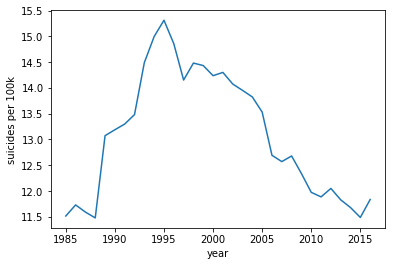

In [0]:
#draw a plot to see the trend during years
plt.plot(per100k)
plt.xlabel('year')
plt.ylabel('suicides per 100k');
print("Peak Suicide Rate:", (per100k.idxmax(), per100k.max()))

Completely contrasting the US, in the plot we create for global suicide rates we notice that suicide rates had shot up from the late 80s to the mid 90s with a peak suicide rate in 1995 of about 15.3 deaths per 100k people. However, while rates in the US had risen, rates for most of the world began to slowly drop after this peak.

## 3.4 Suicides By Gender

In this section, we analyzed our data set by seeing how suicide rates correlate to gender. We begin by comparing the rates of suicide between males and females of different age groups. Globally, the likelihood of suicide seems to increase as age increases. Overall though, the rate of suicide is higher for men than it is for women.

In [0]:
#group data by sex and calculate suicides/100k
sui_sum_sex=data.groupby('sex')['suiciderate'].sum()
pop_sum_sex=data.groupby('sex')['population'].sum()
per100k_sex=(sui_sum_sex / pop_sum_sex) * 100000
per100k_sex


sex
female    0.210160
male      0.881009
dtype: float64

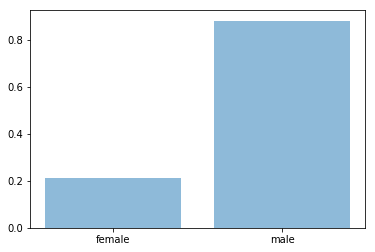

In [0]:
#draw a bar/histograph
names=['female','male']
plt.bar(names,per100k_sex,align='center', alpha=0.5);

From the bar graph and table above, we can see that the suicide rate for men is much higher than that for women. 

In [0]:
sex_age = data.pivot_table(index = 'age', columns = 'sex', values = 'suiciderate')
reorderlist = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
sex_age = sex_age.reindex(reorderlist)
sex_age

sex,female,male
age,,
5-14 years,0.559495,0.766707
15-24 years,4.231605,13.038395
25-34 years,4.362907,18.409907
35-54 years,5.632860,22.758791
55-74 years,6.281674,24.239558
75+ years,7.848047,36.699930


The table above shows the number of suicides per 100,000 people in each age group. We can see that as age increases, there are more suicides per age group.

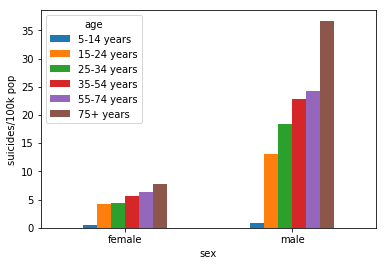

In [0]:
ax = sex_age.T.plot(kind='bar', rot=0)
ylab = ax.set_ylabel('suicides/100k pop')

Above is a bar graph representation of the number of suicides per 100,000 people in each age group, split up by males and females.

In [0]:
#linear model for gender
outcome_gender, predictors_gender = patsy.dmatrices('suiciderate ~ sex', data) 
mod_gender = sm.OLS(outcome_gender,predictors_gender) 
res_gender = mod_gender.fit()
print(res_gender.summary())

                            OLS Regression Results                            
Dep. Variable:            suiciderate   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1205.
Date:                Thu, 13 Jun 2019   Prob (F-statistic):          2.48e-237
Time:                        02:05:34   Log-Likelihood:                -21193.
No. Observations:                5132   AIC:                         4.239e+04
Df Residuals:                    5130   BIC:                         4.240e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8427      0.297     16.308      

From this model, we can see how gender affects suicide rate. Males have a suicide rate that is 14.5774 percent larger than females. The p-value is = 0  which implies that are results are statistically significant. The R-squared value, however, is 0.190 so only a small percentage of the variability in the data can be explained by this model. 

## 3.5 Geographic Analysis on Suicide Rates

We aggregated the suicide rate data and the number of suicides for each country to build an overall map of suicide rates.

In [0]:
suicide_data = data.groupby(data['country'])['suiciderate','suicides_no'].sum()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

suicide_countries = pd.Series(suicide_data.index)
total_countries = pd.Series(world['name'])

Overall, we're still missing data on 97 of the countries that will be mapped.

In [0]:
missing_countries = total_countries[~total_countries.isin(suicide_countries)].sort_values()
len(missing_countries)

97

In [0]:
suicide_world = pd.merge(world, suicide_data, left_on='name', right_on='country', how='left')
suicide_world['suicides_no'].fillna(0, inplace=True)
suicide_world['suicides_per_pop'] = suicide_world['suicides_no'] / suicide_world['pop_est']

base_layer = suicide_world[~suicide_world['name'].isin(missing_countries)]
missing_layer = suicide_world[suicide_world['name'].isin(missing_countries)]

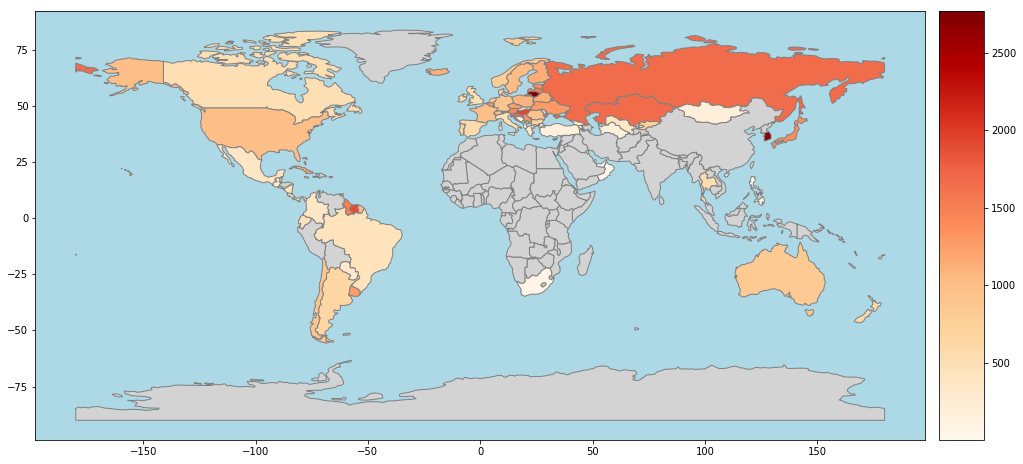

In [0]:
fig, ax = plt.subplots(figsize=(17,10))
divider = make_axes_locatable(ax)

ax.set_facecolor('lightblue')
cax = divider.append_axes('right', size='5%', pad=0.2)

base = base_layer.plot(ax=ax, 
                       column='suiciderate', 
                       cmap='OrRd', 
                       legend=True, 
                       cax=cax, 
                       edgecolor='grey')
total = missing_layer.plot(ax=base, 
                           color='lightgrey', 
                           edgecolor='grey');

In the map above, there are two things that become clear. The first is that there is a large amount of countries that seem to be omitted from the dataset. This can lead to skewed data towards certain regions that are more open to offering information on their suicide rates. Second, if we look at the data, countries on the eastern side of the world seem to have relatively higher suicide rates than those in the western part, with North America and South America having some of the lowest suicide rates (bar a few outliers in Asia and South Africa).

In [0]:
gdp_world = data.groupby(data['country'])['gdp'].mean()
suicide_world = pd.merge(suicide_world, gdp_world, left_on='name', right_on='country', how='left')

In [0]:
suicide_order = suicide_world[suicide_world["suicides_no"] != 0].sort_values(by = ['suiciderate','name'],ascending=[True, False])
colors = []
for continent in suicide_order['continent']:    
    if continent == 'Africa':
        colors.append('r')
    elif continent == 'Asia':
        colors.append('b')
    elif continent == 'Europe':
        colors.append('g')
    elif continent == 'North America':
        colors.append('y')
    elif continent == 'South America':
        colors.append('c')
    elif continent == 'Oceania':
        colors.append('m')
    else:
        colors.append('w')



In the below bar graph, we showed the suicide rate in different countries, and we can see each continent has their own colors. With the given data we have, Europe seems to have the highest suicide rate overall, but this can't be said with certainty because of the amount of missing data we have on other countries.

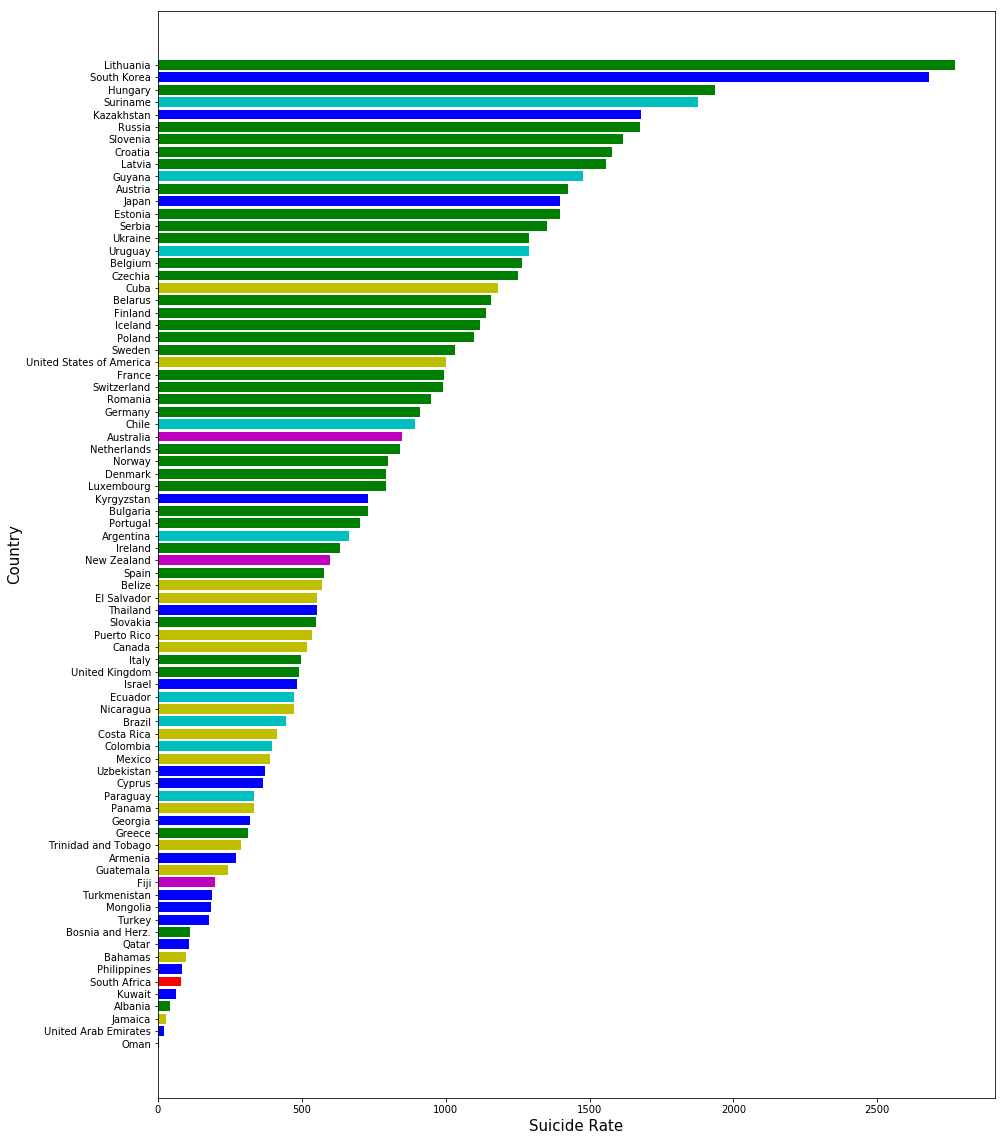

In [0]:
plt.figure(figsize=(15,20))
plt.barh(suicide_order['name'],suicide_order['suiciderate'], color = colors)
plt.xlabel('Suicide Rate', fontsize=15)
plt.ylabel('Country', fontsize=15);

In [0]:
suicide_world_order = suicide_world[suicide_world["suicides_no"] != 0].sort_values(by = ['gdp','name'],ascending=[True, False])
colors = []
for continent in suicide_world_order['continent']:    
    if continent == 'Africa':
        colors.append('r')
    elif continent == 'Asia':
        colors.append('b')
    elif continent == 'Europe':
        colors.append('g')
    elif continent == 'North America':
        colors.append('y')
    elif continent == 'South America':
        colors.append('c')
    elif continent == 'Oceania':
        colors.append('m')
    else:
        colors.append('w')

In the graph below, we show the correlation between GDP and suicide rate. We can see that there doesn't seem to be a trend for suicide rates between countries with low GDPs and c those with high GDPs. So, there is not much correlation between two variables.

Text(0, 0.5, 'Country Sorted by GDP')

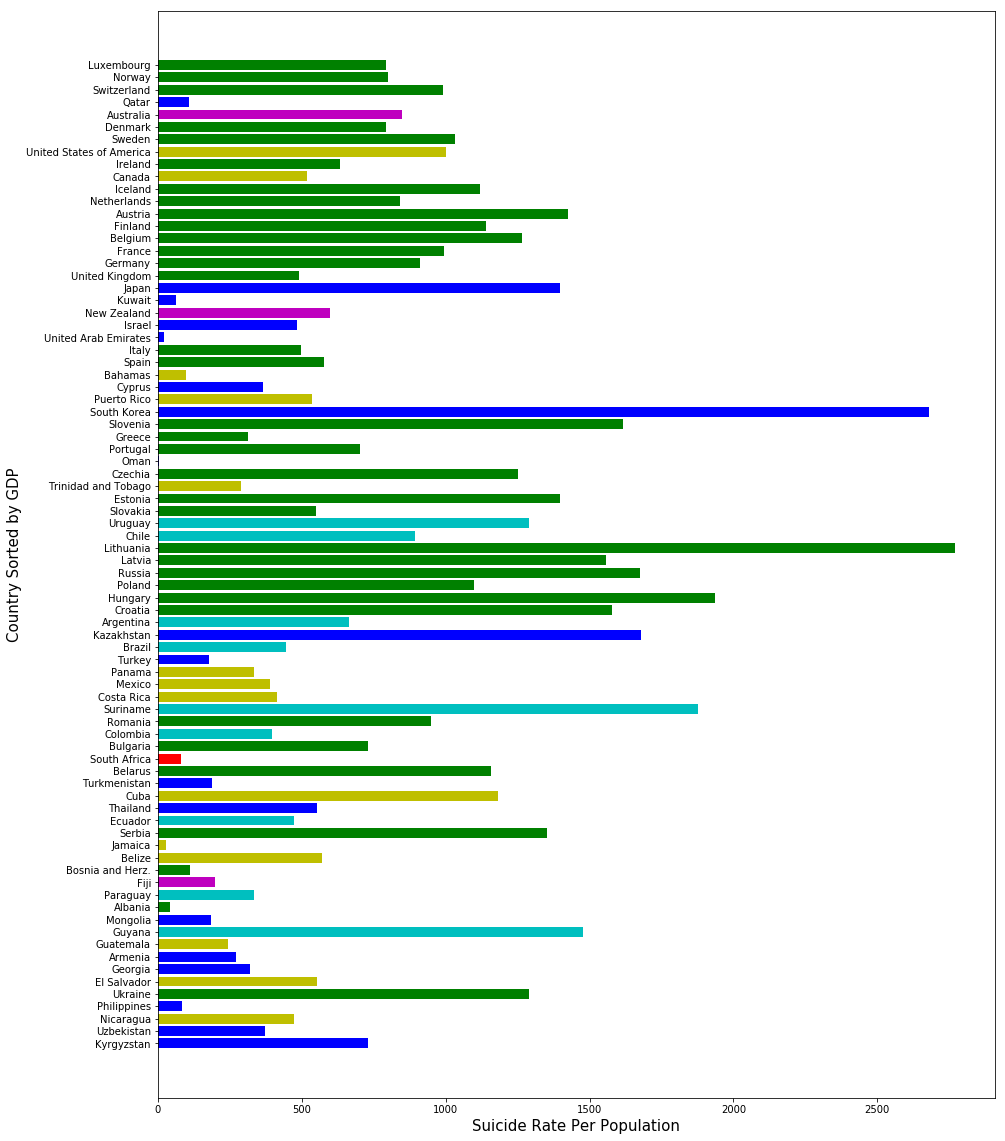

In [0]:
plt.figure(figsize=(15,20))
plt.barh(suicide_world_order['name'],suicide_world_order['suiciderate'], color = colors)
plt.xlabel('Suicide Rate Per Population', fontsize=15)
plt.ylabel('Country Sorted by GDP', fontsize=15)

# 4. Ethics and Privacy


With suicide being a very important and touchy subject in today's society, the ethics surrounding suicide research and databases are extremely important. Data science can expose certain factors that cause events in society, however if not done with the ethics of the data gathered in mind can do more harm than good. The intent of our research was to find more information on what causes suicides globally. 

To determine the ethicality of our project, we will examine the question, implications of the project, data, informed consent, privacy, evaluation, analysis, transparency & appeal, and monitoring. 

First off, our question asks what causes suicides globally, the scope of our question covering dozens of countries over the last two decades. Our research could not be used for nefarious purposes, as the implications of our project are to gather information on what is causing suicides throughout the world, which could be used to help lower these rates. We got the data from a set on Kaggle called 'Suicide Rates Overview 1985 - 2016'. There are over 1000 values from dozens of countries over the years, making it reliable data. The data is organized by number of suicides per year, per country, male or female and in age groups. There are no names or any personal information listed, keeping identities of the people entirely private. 

Our project is simply to gather possible reasonings for suicide globally, which will be how we evaluate our data, resulting in nothing negative happening to anyone because of it. We have a variety of analytical elements to see correlations between county, age, gender, year and GDP to get the most non-biased analysis possible. Through our exploration of the data, a reader can tell that our research was not simply a black box and that there is unbiased reasoning for all of our conclusions. This transparency shows the reliability of our statements and that we can prove our reasoning for everything said. Finally, our data covers the span of almost two decades, so we are taking into account the changes of the world over time. If we were to continue this project, we would keep taking data from more recently and keep continuously monitoring, as the world is always changing. 

In regards to privacy, as said above, there are no names or personal information besides age and gender for anonymous people. Our dataset was kept completely anonymous to respect those who are a part of the list and to give the most accurate results with no biases or exposure. 

# 5. Conclusion and Discussion

With the rise of suicide rates by 33% in the last two decades, we decided to see if there was a correlation between these rates and any other factors - such as gender, age and country GDP. We hypothesized that suicide rates would be higher for younger individuals, males, and those in countries with a weaker economy (lower GDP). First, we analyzed suicide rates by age, splitting our dataset into two groups: 5-34 and 35+. We discovered that those in the 35+ group had a higher rate of suicide (17.24 per 100K people), in comparison to the 5-34 group (6.96 per 100K people). When looking at a larger number of age groups (5-14, 15-24, 25-34, 35-54, 55-74, 75+), we saw that the rate of suicide slowly increased in each group, meaning the older the group, the higher the suicide rate. These observations directly contradict with our hypothesis, which we had stated that we thought younger individuals would have a greater suicide rate. Next we looked at suicides by gender, where we discovered that males have a greater rate than females (.88 in comparison to .21 per 100K people). We looked at suicide rate per gender per age group (listed above) and saw that suicide rates get larger as the age groups get older, with male suicide rates always being greater than females. This data matches our hypothesis, since we said we thought males would have a higher suicide rate than females. Finally, we analyzed geographically, to see if there was a correlation between country GDP and suicide rates. We discovered that there was not much of a correlation between country GDP and suicide rates, as from our graphs we saw there were countries with low GDP and countries with high GDP that had the same rates of suicide. The countries with the highest suicide rates (south Korea and Lithuania) were both in the middle for GDP. This does not prove our hypothesis correct, as we said that countries with lower GDP would have a higher rate of suicide. Overall in our project, through graphs, charts, and tables, we discovered that higher suicide rates come from males and older individuals. 